In [1]:
# %run "Scripts/dataprep.py"
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('Scripts')

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, utils, models
from torch.utils.data import Dataset, DataLoader

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from utils import *
from SSVEPDataset import SSVEPDataset
from classes import *
from SSVEPDataloader import *

from sklearn import preprocessing
import os
import time
import copy
from functools import partial

def read_data(dataframe):
    return torch.tensor(pd.read_csv(dataframe['path'], names = range(1, 16+1), dtype = float).values)

def dataVisualization(X):
    X = X.squeeze().T
    
    fig = plt.figure(figsize = (15, 15))
    ax = fig.add_subplot()
    ax.imshow(X, cmap = 'gray')

In [2]:
dataType = '512'
data = pd.read_csv('SSVEPDataset_'+dataType+'.csv')
dataset = SSVEPDataset(data)

batchSize = 16
dataloaders, datasetsSizes = SSVEPDataloaders(dataset, batchSize)
# example = next(iter(dataloaders['train']))['series']

device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
# device = 'cpu'

In [3]:
exemplo = iter(dataloaders['train']).next()['series']

In [25]:
temp.numpy()

array([ 8.745334e-06, -4.960007e-06, -6.310140e-06, -1.729158e-06,
        1.940045e-06,  1.520842e-07,  6.406735e-06, -9.586012e-06,
       -6.364327e-07, -3.857083e-06,  3.723009e-06,  1.941128e-05,
       -3.954186e-06,  1.298264e-06,  8.346640e-07, -1.147840e-05])

In [46]:
temp = exemplo[0]
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean=[0],
                                     std=[10])
            ])

In [47]:
print(temp)
temp = transform(temp.numpy())[0]
print(temp)

tensor([[[ 8.7453e-06, -4.9600e-06, -6.3101e-06,  ...,  1.2983e-06,
           8.3466e-07, -1.1478e-05],
         [-4.2176e-06,  4.2323e-06, -1.2303e-05,  ...,  2.4556e-06,
           5.2304e-06, -6.9429e-06],
         [-6.5819e-06,  2.0908e-05, -7.8848e-06,  ..., -4.6542e-07,
           3.5678e-06, -2.1380e-06],
         ...,
         [-4.2319e-06, -1.7032e-05, -3.6567e-06,  ...,  3.5395e-06,
           4.1876e-07,  5.5776e-06],
         [-8.3480e-06, -9.2296e-06, -7.7801e-06,  ...,  3.5227e-06,
           2.2672e-06,  7.3274e-06],
         [-1.6241e-05, -4.5076e-06, -1.2887e-05,  ...,  3.6085e-06,
           4.0421e-06,  9.4512e-06]]], dtype=torch.float64)
tensor([[ 8.7453e-07, -4.2176e-07, -6.5819e-07,  4.1195e-09,  1.0103e-06,
          1.9182e-06,  1.6265e-06,  8.3292e-08, -7.1839e-07,  9.1577e-08,
          9.1991e-07,  7.4892e-07,  1.9793e-07, -3.4310e-07, -7.0862e-07,
         -2.7470e-07,  7.3739e-07,  1.2143e-06,  1.0757e-06,  9.2650e-07,
          4.6162e-07, -6.2301e-07, -1

(array([ 10.,  42.,  88., 126., 110.,  78.,  40.,  13.,   4.,   1.]),
 array([-2.8267320e-05, -2.1207922e-05, -1.4148524e-05, -7.0891260e-06,
        -2.9728000e-08,  7.0296700e-06,  1.4089068e-05,  2.1148466e-05,
         2.8207864e-05,  3.5267262e-05,  4.2326660e-05]),
 <a list of 10 Patch objects>)

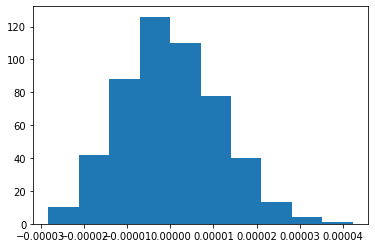

In [41]:
fig, ax = plt.subplots()
ax.hist(temp[0], bins = 10)

(array([1., 3., 1., 1., 2., 3., 3., 1., 0., 1.]),
 array([-1.2303220e-05, -9.5964950e-06, -6.8897700e-06, -4.1830450e-06,
        -1.4763200e-06,  1.2304050e-06,  3.9371300e-06,  6.6438550e-06,
         9.3505800e-06,  1.2057305e-05,  1.4764030e-05]),
 <a list of 10 Patch objects>)

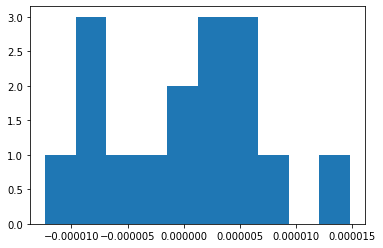

In [20]:
fig, ax = plt.subplots()
ax.hist(exemplo[0][0][1], bins = 10)